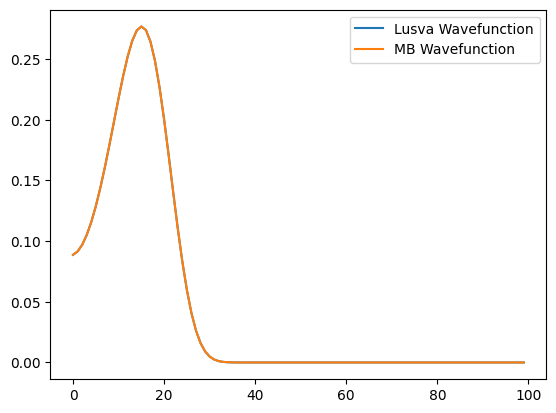

In [234]:
import kinetic_energy as kin
import numpy as np
import phi
import importlib
from functools import partial
import matplotlib.pyplot as plt
N_test = 3  
importlib.reload(kin)
N_test = 5
sigma = 1
box_size=1
mb_lusva_normalisation = (sigma**2*np.pi)**(1/2)
#totla wf's
wavefunction = phi.functchoicejastrow(N_test)
wf_mb = partial(kin.total_wf, N=N_test, N_up= N_test//2, sigma = sigma, b_par = phi.jauu, b_orth = phi.jbuu)

m=-1
single_particle_wf = phi.single_wf_choice(m)
s_p_wf_mb = partial(kin.single_particle_wf, m=m, sigma = sigma)

wf_value_lusva= np.zeros(100)
wf_value_mb= np.zeros(100)

r_test = np.random.uniform(-1, 1, size=(2,))
for i in range(100):
    r_test= r_test + i/200  # Example positions for testing  
    wf_value_lusva[i] = single_particle_wf(r_test[0],r_test[1],b=sigma)/mb_lusva_normalisation #we use different normalisation but single-particle wf are compatible
    wf_value_mb[i] = s_p_wf_mb(r=r_test)
plt.plot(wf_value_lusva, label='Lusva Wavefunction')    
plt.plot(wf_value_mb, label='MB Wavefunction')
plt.legend()

spins are par 1
spins are par 1
spins are antipar 1
spins are antipar 1
spins are antipar 1
spins are par 1
spins are antipar 1
spins are antipar 1
spins are antipar 1
spins are antipar 1
spins are antipar 1
spins are antipar 1
spins are par 1
spins are par 1
spins are par 1
spins are par 1
spins are par 1
spins are antipar 1
spins are antipar 1
spins are antipar 1
spins are par 1
spins are antipar 1
spins are antipar 1
spins are antipar 1
spins are antipar 1
spins are antipar 1
spins are antipar 1
spins are par 1
spins are par 1
spins are par 1
spins are par 1
spins are par 1
spins are antipar 1
spins are antipar 1
spins are antipar 1
spins are par 1
spins are antipar 1
spins are antipar 1
spins are antipar 1
spins are antipar 1
spins are antipar 1
spins are antipar 1
spins are par 1
spins are par 1
spins are par 1
spins are par 1
spins are par 1
spins are antipar 1
spins are antipar 1
spins are antipar 1
spins are par 1
spins are antipar 1
spins are antipar 1
spins are antipar 1
spin

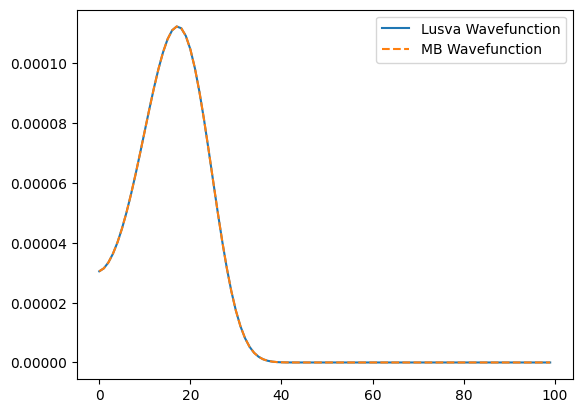

In [231]:
#slaters
N = 6
slater_lusva = phi.functchoice(N)

#mb
from functools import partial
phi0 =  partial(kin.single_particle_wf, m=0, sigma = sigma)
phi_plus =  partial(kin.single_particle_wf, m=1, sigma = sigma)
phi_minus =  partial(kin.single_particle_wf, m=-1, sigma = sigma)

N_up = kin.N_up_choice(N)
slater_up = partial(kin.slater_det, M = N_up, phi1 = phi0, phi2= phi_plus, phi3 = phi_minus, return_A = False)
slater_down = partial(kin.slater_det, M = N-N_up, phi1 = phi0, phi2= phi_plus, phi3 = phi_minus, return_A = False)
slater_mb = lambda R: slater_up(R=R[:N_up]) * slater_down(R=R[N_up:])

wf_mb = partial(kin.total_wf, N=N, N_up= kin.N_up_choice(N), sigma = sigma, b_par = phi.jbuu, b_orth = phi.jbud,return_A=False)


wf_value_lusva= np.zeros(100)
wf_value_mb= np.zeros(100)
R_test = np.random.uniform(0, box_size, size=(2,N))

for i in range(100):
    R_test[1][N-1] = R_test[1][N-1] + i/200  # Example positions for testing  
    R_test_T = R_test.T
    if N == 1:
        wf_value_lusva[i] = slater_lusva(R_test[0],R_test[1], sigma)/mb_lusva_normalisation
    else:
        wf_value_lusva[i] = slater_lusva(R_test, sigma)/mb_lusva_normalisation**N
#    wf_value_mb[i] = slater_mb(R_test_T)
    phi,slat_up,slat_down = wf_mb(R=R_test_T)
    wf_value_mb[i]= slat_up*slat_down
plt.plot(wf_value_lusva, label='Lusva Wavefunction')    
plt.plot(wf_value_mb, label='MB Wavefunction', linestyle='--')
plt.legend()

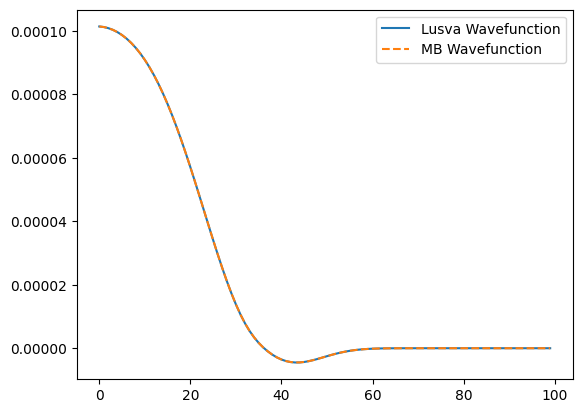

In [250]:
import importlib

importlib.reload(kin)
importlib.reload(phi)
N = 6
tot_wf_value_lusva= np.zeros(100)
tot_wf_value_mb= np.zeros(100)
wavefunction = phi.functchoicejastrow(N)
wf_mb = partial(kin.total_wf, N=N, N_up= kin.N_up_choice(N), sigma = sigma, b_par = phi.jbuu, b_orth = phi.jbud)
R_test = np.random.uniform(0, box_size*2, size=(2,N))
n_sample=100
for i in range(n_sample):
    R_test[1][N-1] = R_test[1][N-1] + i/(5*n_sample) # Example positions for testing  
    R_test_T = R_test.T
    tot_wf_value_lusva[i] = wavefunction(R_test, sigma)/mb_lusva_normalisation**N
    tot_wf_value_mb[i] =wf_mb(R=R_test_T)[0]
plt.plot(tot_wf_value_lusva, label='Lusva Wavefunction')    
plt.plot(tot_wf_value_mb, label='MB Wavefunction', linestyle='--')
plt.legend()